# Similarity metrics for segmentation quality

## Non-labeled dataset

### ATLAS vs DL

Allignment

In [ ]:
import nibabel as nb
from pathlib import Path
import numpy as np
import glob, os

reg_dir = '/mnt/sda1/Repos/a-eye/Data/SHIP_dataset/non_labeled_dataset_nifti_reg_2/'
dl_dir = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/3D_multilabel/experiment_0/test_orig_reg-cropped_non-labeled'
output_path = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/3D_multilabel/experiment_0/test_orig_reg-cropped_non-labeled_allign'
if not os.path.exists(output_path):
    os.makedirs(output_path)

i=0
for folder1 in sorted(os.listdir(reg_dir)):

    # Name subject
    name_subject = folder1
    print(f'subject: {name_subject}')

    # Load t1_aux (to allign the other)
    t1_aux = nb.load(f'{reg_dir}{folder1}/labels.nii.gz')

    # Load t1 image (not alligned)
    t1 = nb.load(f'{dl_dir}{folder1}_cropped_seg_res.nii.gz')

    # Copy affine from t1_aux to t1
    nii = nb.Nifti1Image(t1.dataobj, t1_aux.affine, t1.header)
    nii.to_filename(f'{output_path}{name_subject}_cropped_seg_res_allign.nii.gz')
    
    # Dealing with files in that folder
    # for f in glob.glob(base_dir+folder1+'/input/'+folder1+'_T1_oriented_hdr.nii.gz'):
    #     os.remove(f)

    i+=1
    # if (i==1):
    #     break

Compute metrics

In [ ]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import os
import nibabel as nb

# nDSC (normalized DSC)
def dice_norm_metric(ground_truth, predictions):
    '''
    For a single example returns DSC_norm, fpr, fnr
    '''

    # Reference for normalized DSC
    r = 0.001 # It should be 1/N*(np.sum(voxels_label[i])/np.sum(voxels_image[i])) i belonging to training set
    # Cast to float32 type
    gt = ground_truth.astype("float32")
    seg = predictions.astype("float32")
    im_sum = np.sum(seg) + np.sum(gt)
    if im_sum == 0:
        return 1.0, 1.0, 1.0
    else:
        if np.sum(gt) == 0:
            k = 1.0
        else:
            k = (1 - r) * np.sum(gt) / (r * (len(gt.flatten()) - np.sum(gt)))
        tp = np.sum(seg[gt == 1])
        fp = np.sum(seg[gt == 0])
        fn = np.sum(gt[seg == 0])
        fp_scaled = k * fp
        dsc_norm = 2 * tp / (fp_scaled + 2 * tp + fn)

        fpr = fp / (len(gt.flatten()) - np.sum(gt))
        if np.sum(gt) == 0:
            fnr = 1.0
        else:
            fnr = fn / np.sum(gt)
        return dsc_norm # fpr, fnr

# Paths - segmentation results
reg_dir = '/mnt/sda1/Repos/a-eye/Data/SHIP_dataset/non_labeled_dataset_nifti_reg_2/'
dl_dir = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/3D_multilabel/experiment_0/test_orig_reg-cropped_non-labeled_allign'
nnunet_dir = 

# List of volumes for each individual label and subject
len_path = len([elem for elem in os.listdir(reg_dir)]) # elements in gt path = number of subjects
name_subject = [None]*len_path

# Save values in an array
# All labels
val_dsc             = np.zeros(len_path)
# val_hau = np.zeros(len(rest_subjects))
val_hau_avg         = np.zeros(len_path)
val_vol             = np.zeros(len_path)
val_ndsc            = np.zeros(len_path)
# Lens
val_dsc_lens        = np.zeros(len_path)
val_hau_avg_lens    = np.zeros(len_path)
val_vol_lens        = np.zeros(len_path)
val_ndsc_lens       = np.zeros(len_path)
# Globe
val_dsc_globe       = np.zeros(len_path)
val_hau_avg_globe   = np.zeros(len_path)
val_vol_globe       = np.zeros(len_path)
val_ndsc_globe      = np.zeros(len_path)
# Optic nerve  
val_dsc_nerve       = np.zeros(len_path)
val_hau_avg_nerve   = np.zeros(len_path)
val_vol_nerve       = np.zeros(len_path)
val_ndsc_nerve      = np.zeros(len_path)
# Intraconal fat
val_dsc_int_fat     = np.zeros(len_path)
val_hau_avg_int_fat = np.zeros(len_path)
val_vol_int_fat     = np.zeros(len_path)
val_ndsc_int_fat    = np.zeros(len_path)
# Extraconal fat
val_dsc_ext_fat     = np.zeros(len_path)
val_hau_avg_ext_fat = np.zeros(len_path)
val_vol_ext_fat     = np.zeros(len_path)
val_ndsc_ext_fat    = np.zeros(len_path)
# Lateral rectus muscle
val_dsc_lat_mus     = np.zeros(len_path)
val_hau_avg_lat_mus = np.zeros(len_path)
val_vol_lat_mus     = np.zeros(len_path)
val_ndsc_lat_mus    = np.zeros(len_path)
# Medial rectus musclenp.zeros(len_path)
val_dsc_med_mus     = np.zeros(len_path)
val_hau_avg_med_mus = np.zeros(len_path)
val_vol_med_mus     = np.zeros(len_path)
val_ndsc_med_mus    = np.zeros(len_path)
# Inferior rectus muscle
val_dsc_inf_mus     = np.zeros(len_path)
val_hau_avg_inf_mus = np.zeros(len_path)
val_vol_inf_mus     = np.zeros(len_path)
val_ndsc_inf_mus    = np.zeros(len_path)
# Superior rectus muscnp.zeros(len_path)
val_dsc_sup_mus     = np.zeros(len_path)
val_hau_avg_sup_mus = np.zeros(len_path)
val_vol_sup_mus     = np.zeros(len_path)
val_ndsc_sup_mus    = np.zeros(len_path)
    
reader = sitk.ImageFileReader()

i=0
for folder1 in sorted(os.listdir(reg_dir)):

    # Name subject
    name_subject[i] = str(folder1)
    print(f'subject: {name_subject[i]}')
    
    # ATLAS-based registration results
    reg_lab_path = f'{reg_dir}{folder1}/labels.nii.gz'
    reader.SetFileName(reg_lab_path)
    reg_lab_sitk = sitk.Cast(reader.Execute(), sitk.sitkUInt8)
    reg_lab_arr = sitk.GetArrayFromImage(reg_lab_sitk)

    # Deep Learning results
    dl_lab_path = f'{dl_dir}{folder1}_cropped_seg_res_allign.nii.gz'
    reader.SetFileName(dl_lab_path)
    dl_lab_sitk = sitk.Cast(reader.Execute(), sitk.sitkUInt8)
    dl_lab_arr = sitk.GetArrayFromImage(dl_lab_sitk)
    
    # Image size
    im_lab_size = reg_lab_arr.shape[0]*reg_lab_arr.shape[1]*reg_lab_arr.shape[2]

    # LENS
    # Measures Image Filter 
    overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_measures_filter.Execute(reg_lab_sitk==1, dl_lab_sitk==1)
    # DSC
    dsc = overlap_measures_filter.GetDiceCoefficient() # Get the mean overlap (Dice coefficient) over all labels
    val_dsc_lens[i] = dsc
    # Volume
    vol = overlap_measures_filter.GetVolumeSimilarity() # Get the volume similarity over all labels
    val_vol_lens[i] = vol
    # Hausdorff distance
    if np.count_nonzero(reg_lab_arr==1)==0 or np.count_nonzero(dl_lab_arr==1)==0: val_hau_avg_lens[i] = 100
    else :
        hausdorf = sitk.HausdorffDistanceImageFilter()
        hausdorf.Execute(reg_lab_sitk==1, dl_lab_sitk==1)
        hausdorf_distance_avg = hausdorf.GetAverageHausdorffDistance() # Return the computed Hausdorff distance
        val_hau_avg_lens[i] = hausdorf_distance_avg
    # nDSC
    nDSC = dice_norm_metric(reg_lab_arr==1, dl_lab_arr==1)
    val_ndsc_lens[i] = nDSC
    
    # GLOBE EX LENS
    # Measures Image Filter 
    overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_measures_filter.Execute(reg_lab_sitk==2, dl_lab_sitk==2)
    # DSC
    dsc = overlap_measures_filter.GetDiceCoefficient() # Get the mean overlap (Dice coefficient) over all labels
    val_dsc_globe[i] = dsc
    # Volume
    vol = overlap_measures_filter.GetVolumeSimilarity() # Get the volume similarity over all labels
    val_vol_globe[i] = vol
    # Hausdorff distance
    hausdorf = sitk.HausdorffDistanceImageFilter()
    hausdorf.Execute(reg_lab_sitk==2, dl_lab_sitk==2)
    hausdorf_distance_avg = hausdorf.GetAverageHausdorffDistance() # Return the computed Hausdorff distance
    val_hau_avg_globe[i] = hausdorf_distance_avg
    # nDSC
    nDSC = dice_norm_metric(reg_lab_arr==2, dl_lab_arr==2)
    val_ndsc_globe[i] = nDSC

    # OPTIC NERVE
    # Measures Image Filter 
    overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_measures_filter.Execute(reg_lab_sitk==3, dl_lab_sitk==3)
    # DSC
    dsc = overlap_measures_filter.GetDiceCoefficient() # Get the mean overlap (Dice coefficient) over all labels
    val_dsc_nerve[i] = dsc
    # Volume
    vol = overlap_measures_filter.GetVolumeSimilarity() # Get the volume similarity over all labels
    val_vol_nerve[i] = vol
    # Hausdorff distance
    hausdorf = sitk.HausdorffDistanceImageFilter()
    hausdorf.Execute(reg_lab_sitk==3, dl_lab_sitk==3)
    hausdorf_distance_avg = hausdorf.GetAverageHausdorffDistance() # Return the computed Hausdorff distance
    val_hau_avg_nerve[i] = hausdorf_distance_avg
    # nDSC
    nDSC = dice_norm_metric(reg_lab_arr==3, dl_lab_arr==3)
    val_ndsc_nerve[i] = nDSC

    # INTRACONAL FAT
    # Measures Image Filter 
    overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_measures_filter.Execute(reg_lab_sitk==4, dl_lab_sitk==4)
    # DSC
    dsc = overlap_measures_filter.GetDiceCoefficient() # Get the mean overlap (Dice coefficient) over all labels
    val_dsc_int_fat[i] = dsc
    # Volume
    vol = overlap_measures_filter.GetVolumeSimilarity() # Get the volume similarity over all labels
    val_vol_int_fat[i] = vol
    # Hausdorff distance
    hausdorf = sitk.HausdorffDistanceImageFilter()
    hausdorf.Execute(reg_lab_sitk==4, dl_lab_sitk==4)
    hausdorf_distance_avg = hausdorf.GetAverageHausdorffDistance() # Return the computed Hausdorff distance
    val_hau_avg_int_fat[i] = hausdorf_distance_avg
    # nDSC
    nDSC = dice_norm_metric(reg_lab_arr==4, dl_lab_arr==4)
    val_ndsc_int_fat[i] = nDSC

    # EXTRACONAL FAT
    # Measures Image Filter 
    overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_measures_filter.Execute(reg_lab_sitk==5, dl_lab_sitk==5)
    # DSC
    dsc = overlap_measures_filter.GetDiceCoefficient() # Get the mean overlap (Dice coefficient) over all labels
    val_dsc_ext_fat[i] = dsc
    # Volume
    vol = overlap_measures_filter.GetVolumeSimilarity() # Get the volume similarity over all labels
    val_vol_ext_fat[i] = vol
    # Hausdorff distance
    hausdorf = sitk.HausdorffDistanceImageFilter()
    hausdorf.Execute(reg_lab_sitk==5, dl_lab_sitk==5)
    hausdorf_distance_avg = hausdorf.GetAverageHausdorffDistance() # Return the computed Hausdorff distance
    val_hau_avg_ext_fat[i] = hausdorf_distance_avg
    # nDSC
    nDSC = dice_norm_metric(reg_lab_arr==5, dl_lab_arr==5)
    val_ndsc_ext_fat[i] = nDSC

    # LATERAL RECTUS MUSCLE
    # Measures Image Filter 
    overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_measures_filter.Execute(reg_lab_sitk==6, dl_lab_sitk==6)
    # DSC
    dsc = overlap_measures_filter.GetDiceCoefficient() # Get the mean overlap (Dice coefficient) over all labels
    val_dsc_lat_mus[i] = dsc
    # Volume
    vol = overlap_measures_filter.GetVolumeSimilarity() # Get the volume similarity over all labels
    val_vol_lat_mus[i] = vol
    # Hausdorff distance
    hausdorf = sitk.HausdorffDistanceImageFilter()
    hausdorf.Execute(reg_lab_sitk==6, dl_lab_sitk==6)
    hausdorf_distance_avg = hausdorf.GetAverageHausdorffDistance() # Return the computed Hausdorff distance
    val_hau_avg_lat_mus[i] = hausdorf_distance_avg
    # nDSC
    nDSC = dice_norm_metric(reg_lab_arr==6, dl_lab_arr==6)
    val_ndsc_lat_mus[i] = nDSC

    # MEDIAL RECTUS MUSCLE
    # Measures Image Filter 
    overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_measures_filter.Execute(reg_lab_sitk==7, dl_lab_sitk==7)
    # DSC
    dsc = overlap_measures_filter.GetDiceCoefficient() # Get the mean overlap (Dice coefficient) over all labels
    val_dsc_med_mus[i] = dsc
    # Volume
    vol = overlap_measures_filter.GetVolumeSimilarity() # Get the volume similarity over all labels
    val_vol_med_mus[i] = vol
    # Hausdorff distance
    if np.count_nonzero(reg_lab_arr==7)==0 or np.count_nonzero(dl_lab_arr==7)==0: val_hau_avg_lens[i] = 100
    else :
        hausdorf = sitk.HausdorffDistanceImageFilter()
        hausdorf.Execute(reg_lab_sitk==7, dl_lab_sitk==7)
        hausdorf_distance_avg = hausdorf.GetAverageHausdorffDistance() # Return the computed Hausdorff distance
        val_hau_avg_med_mus[i] = hausdorf_distance_avg
    # nDSC
    nDSC = dice_norm_metric(reg_lab_arr==7, dl_lab_arr==7)
    val_ndsc_med_mus[i] = nDSC

    # INFERIOR RECTUS MUSCLE
    # Measures Image Filter 
    overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_measures_filter.Execute(reg_lab_sitk==8, dl_lab_sitk==8)
    # DSC
    dsc = overlap_measures_filter.GetDiceCoefficient() # Get the mean overlap (Dice coefficient) over all labels
    val_dsc_inf_mus[i] = dsc
    # Volume
    vol = overlap_measures_filter.GetVolumeSimilarity() # Get the volume similarity over all labels
    val_vol_inf_mus[i] = vol
    # Hausdorff distance
    if np.count_nonzero(reg_lab_arr==8)==0 or np.count_nonzero(dl_lab_arr==8)==0: val_hau_avg_lens[i] = 100
    else :
        hausdorf = sitk.HausdorffDistanceImageFilter()
        hausdorf.Execute(reg_lab_sitk==8, dl_lab_sitk==8)
        hausdorf_distance_avg = hausdorf.GetAverageHausdorffDistance() # Return the computed Hausdorff distance
        val_hau_avg_inf_mus[i] = hausdorf_distance_avg
    # nDSC
    nDSC = dice_norm_metric(reg_lab_arr==8, dl_lab_arr==8)
    val_ndsc_inf_mus[i] = nDSC

    # SUPERIOR RECTUS MUSCLE
    # Measures Image Filter 
    overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_measures_filter.Execute(reg_lab_sitk==9, dl_lab_sitk==9)
    # DSC
    dsc = overlap_measures_filter.GetDiceCoefficient() # Get the mean overlap (Dice coefficient) over all labels
    val_dsc_sup_mus[i] = dsc
    # Volume
    vol = overlap_measures_filter.GetVolumeSimilarity() # Get the volume similarity over all labels
    val_vol_sup_mus[i] = vol
    # Hausdorff distance
    hausdorf = sitk.HausdorffDistanceImageFilter()
    hausdorf.Execute(reg_lab_sitk==9, dl_lab_sitk==9)
    hausdorf_distance_avg = hausdorf.GetAverageHausdorffDistance() # Return the computed Hausdorff distance
    val_hau_avg_sup_mus[i] = hausdorf_distance_avg
    # nDSCvol
    nDSC = dice_norm_metric(reg_lab_arr==9, dl_lab_arr==9)
    val_ndsc_sup_mus[i] = nDSC

    # ALL LABELS
    # DSC
    dsc = (val_dsc_lens[i]+val_dsc_globe[i]+val_dsc_nerve[i]+val_dsc_int_fat[i]+val_dsc_ext_fat[i]+val_dsc_lat_mus[i]+val_dsc_med_mus[i]+val_dsc_inf_mus[i]+val_dsc_sup_mus[i])/9
    val_dsc[i] = dsc
    # Volume
    vol = (val_vol_lens[i]+val_vol_globe[i]+val_vol_nerve[i]+val_vol_int_fat[i]+val_vol_ext_fat[i]+val_vol_lat_mus[i]+val_vol_med_mus[i]+val_vol_inf_mus[i]+val_vol_sup_mus[i])/9
    val_vol[i] = vol
    # Hausdorff distance
    hau_avg = (val_hau_avg_lens[i]+val_hau_avg_globe[i]+val_hau_avg_nerve[i]+val_hau_avg_int_fat[i]+val_hau_avg_ext_fat[i]+val_hau_avg_lat_mus[i]+val_hau_avg_med_mus[i]+val_hau_avg_inf_mus[i]+val_hau_avg_sup_mus[i])/9
    val_hau_avg[i] = hau_avg
    # nDSC
    nDSC = (val_ndsc_lens[i]+val_ndsc_globe[i]+val_ndsc_nerve[i]+val_ndsc_int_fat[i]+val_ndsc_ext_fat[i]+val_ndsc_lat_mus[i]+val_ndsc_med_mus[i]+val_ndsc_inf_mus[i]+val_ndsc_sup_mus[i])/9
    val_ndsc[i] = nDSC

    i+=1
    # if i==2:
    #     break

Save values to .csv

In [ ]:
import csv

metrics = [
    'Subject',  'DSC_all',     'Haus_avg_all',     'Volume_all',     'nDSC_all', 
                'DSC_lens',    'Haus_avg_lens',    'Volume_lens',    'nDSC_lens',  
                'DSC_globe',   'Haus_avg_globe',   'Volume_globe',   'nDSC_globe', 
                'DSC_nerve',   'Haus_avg_nerve',   'Volume_nerve',   'nDSC_nerve', 
                'DSC_int_fat', 'Haus_avg_int_fat', 'Volume_int_fat', 'nDSC_int_fat',
                'DSC_ext_fat', 'Haus_avg_ext_fat', 'Volume_ext_fat', 'nDSC_ext_fat',
                'DSC_lat_mus', 'Haus_avg_lat_mus', 'Volume_lat_mus', 'nDSC_lat_mus',
                'DSC_med_mus', 'Haus_avg_med_mus', 'Volume_med_mus', 'nDSC_med_mus',
                'DSC_inf_mus', 'Haus_avg_inf_mus', 'Volume_inf_mus', 'nDSC_inf_mus',
                'DSC_sup_mus', 'Haus_avg_sup_mus', 'Volume_sup_mus', 'nDSC_sup_mus'
]

vals = np.array([
    name_subject,   val_dsc,         val_hau_avg,         val_vol,         val_ndsc,        
                    val_dsc_lens,    val_hau_avg_lens,    val_vol_lens,    val_ndsc_lens,   
                    val_dsc_globe,   val_hau_avg_globe,   val_vol_globe,   val_ndsc_globe,  
                    val_dsc_nerve,   val_hau_avg_nerve,   val_vol_nerve,   val_ndsc_nerve,  
                    val_dsc_int_fat, val_hau_avg_int_fat, val_vol_int_fat, val_ndsc_int_fat,
                    val_dsc_ext_fat, val_hau_avg_ext_fat, val_vol_ext_fat, val_ndsc_ext_fat,
                    val_dsc_lat_mus, val_hau_avg_lat_mus, val_vol_lat_mus, val_ndsc_lat_mus,
                    val_dsc_med_mus, val_hau_avg_med_mus, val_vol_med_mus, val_ndsc_med_mus,
                    val_dsc_inf_mus, val_hau_avg_inf_mus, val_vol_inf_mus, val_ndsc_inf_mus,
                    val_dsc_sup_mus, val_hau_avg_sup_mus, val_vol_sup_mus, val_ndsc_sup_mus,
])

vals = vals.T

with open('/mnt/sda1/Repos/a-eye/Output/sim_reg_vs_dl.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(metrics)
    writer.writerows(vals)

Read values from .csv

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import Line2D
import numpy as np

csv_file = pd.read_csv('/mnt/sda1/Repos/a-eye/Output/sim_reg_vs_dl.csv')

# Dataframes {DSC, nDSC, Volume (voxels)} separate labels for N=5 only
data_dsc = [csv_file['DSC_all'], csv_file['DSC_lens'], csv_file['DSC_globe'], csv_file['DSC_nerve'], csv_file['DSC_int_fat'], csv_file['DSC_ext_fat'], csv_file['DSC_lat_mus'], csv_file['DSC_med_mus'], csv_file['DSC_inf_mus'], csv_file['DSC_sup_mus']]
data_ndsc = [csv_file['nDSC_all'],  csv_file['nDSC_lens'], csv_file['nDSC_globe'], csv_file['nDSC_nerve'], csv_file['nDSC_int_fat'], csv_file['nDSC_ext_fat'], csv_file['nDSC_lat_mus'], csv_file['nDSC_med_mus'], csv_file['nDSC_inf_mus'], csv_file['nDSC_sup_mus']]
data_vol = [csv_file['Volume_all'], csv_file['Volume_lens'], csv_file['Volume_globe'], csv_file['Volume_nerve'], csv_file['Volume_int_fat'], csv_file['Volume_ext_fat'], csv_file['Volume_lat_mus'], csv_file['Volume_med_mus'], csv_file['Volume_inf_mus'], csv_file['Volume_sup_mus']]
data_haus = [csv_file['Haus_avg_all'], csv_file['Haus_avg_lens'], csv_file['Haus_avg_globe'], csv_file['Haus_avg_nerve'], csv_file['Haus_avg_int_fat'], csv_file['Haus_avg_ext_fat'], csv_file['Haus_avg_lat_mus'], csv_file['Haus_avg_med_mus'], csv_file['Haus_avg_inf_mus'], csv_file['Haus_avg_sup_mus']]

labels = ['lens', 'globe', 'nerve', 'intraconal fat', 'extraconal fat', 'lateral rectus muscle', 'medial rectus muscle', 'inferior rectus muscle', 'superior rectus muscle']
median = [np.around(np.median(x), 2) for x in data_dsc]
for i in range(len(labels)):
    print(labels[i], median[i])

# Figure
fig, axs = plt.subplots(3, figsize=(20,10), sharex=True)
fig.canvas.manager.set_window_title('Similarity metrics ATLAS vs DL')
fig.suptitle('Similarity metrics ATLAS vs DL')

# Set labels and titles
axs[0].set_title('DSC')
axs[0].set_ylim([0, 1])
axs[1].set_title('Volume similarity')
axs[1].set_ylim([-2, 2])
axs[2].set_title('Hausdorff distance')
axs[2].set_ylim([0, 3])

# Outliers
flierprops = dict(markerfacecolor='0.9', markersize=4, linestyle='none')

# Boxplot & Swarmplot (points)
axs[0] = sns.boxplot(data=data_dsc, ax=axs[0], flierprops=flierprops).set(ylabel="Value")
axs[1] = sns.boxplot(data=data_vol, ax=axs[1], flierprops=flierprops).set(ylabel="Value")
axs[2] = sns.boxplot(data=data_haus, ax=axs[2], flierprops=flierprops).set(ylabel="Value")
# axs[0].set_xticks(['all','lens','globe','nerve','int_fat','ext_fat','lat_mus','med_mus','inf_mus','sup_mus'])

plt.show

# Save figure
plt.savefig('/mnt/sda1/Repos/a-eye/Output/reg_vs_dl.png', bbox_inches='tight')

## Labeled dataset

### ATLAS vs nnUNet

Read csv

In [1]:
from matplotlib.pyplot import Line2D
import pandas as pd

nnunet_path = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/nnUNet/nnUNet/nnUNet_inference/nnUNet_inference_labeled_dataset/' 

# CSVs
csv_dsc_reg = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/3D_multilabel/experiment_0/test_orig/data_dsc_reg.csv'
csv_dsc_dl = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/3D_multilabel/experiment_0/test_orig/data_dsc.csv'
csv_dsc_nn = f'{nnunet_path}data_dsc_nn.csv'

# Pandas read CSV
df_reg = pd.read_csv(csv_dsc_reg)
df_dl = pd.read_csv(csv_dsc_dl)
df_nn = pd.read_csv(csv_dsc_nn)

# Gather data from generated dataframes
df_dsc = [
    df_reg['DSC_all'], df_nn['DSC_all'], 
    df_reg['DSC_lens'], df_nn['DSC_lens'], 
    df_reg['DSC_globe'], df_nn['DSC_globe'], 
    df_reg['DSC_nerve'], df_nn['DSC_nerve'], 
    df_reg['DSC_int_fat'], df_nn['DSC_int_fat'], 
    df_reg['DSC_ext_fat'], df_nn['DSC_ext_fat'], 
    df_reg['DSC_lat_mus'], df_nn['DSC_lat_mus'], 
    df_reg['DSC_med_mus'], df_nn['DSC_med_mus'], 
    df_reg['DSC_inf_mus'], df_nn['DSC_inf_mus'], 
    df_reg['DSC_sup_mus'], df_nn['DSC_sup_mus']]

Plot

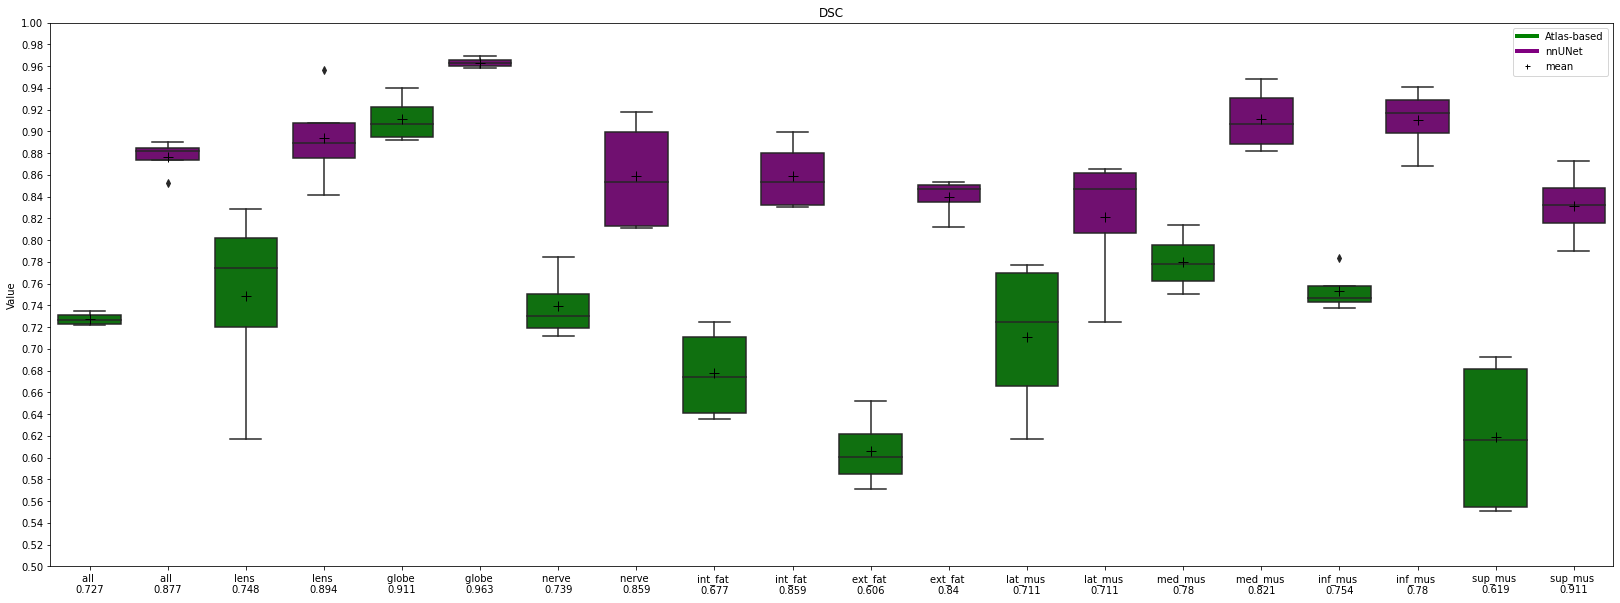

In [36]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import Line2D
import numpy as np

# Figure
fig, axs = plt.subplots(figsize=(28,10))
fig.canvas.manager.set_window_title('DSC per label')
fig.patch.set_facecolor('white')

# Legend
legend_elements = [Line2D([0], [0], color='green', lw=4, label='Atlas-based'),
    Line2D([0], [0], color='purple', lw=4, label='nnUNet'),
    Line2D([], [], color='black', label='mean', marker='+', markersize=5, linestyle='None')]

# Axis
colours_palette = ['green','purple','green','purple','green','purple','green','purple','green','purple','green','purple','green','purple','green','purple','green','purple','green','purple']
meanpointprops = {"marker":"+", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"10"}
ax = sns.boxplot(data=df_dsc, palette=colours_palette, showmeans=True, meanprops=meanpointprops)
# ax = sns.swarmplot(data=df_dsc)
ax.set_title('DSC')
ax.legend(handles=legend_elements)
ax.set(ylabel="Value")
ax.set_xticklabels([
    f'all \n{np.around(np.mean(df_dsc[0]), 3)}', f'all \n{np.around(np.mean(df_dsc[1]), 3)}',
    f'lens \n{np.around(np.mean(df_dsc[2]), 3)}', f'lens \n{np.around(np.mean(df_dsc[3]), 3)}',
    f'globe \n{np.around(np.mean(df_dsc[4]), 3)}', f'globe \n{np.around(np.mean(df_dsc[5]), 3)}',
    f'nerve \n{np.around(np.mean(df_dsc[6]), 3)}', f'nerve \n{np.around(np.mean(df_dsc[7]), 3)}',
    f'int_fat \n{np.around(np.mean(df_dsc[8]), 3)}', f'int_fat \n{np.around(np.mean(df_dsc[9]), 3)}',
    f'ext_fat \n{np.around(np.mean(df_dsc[10]), 3)}', f'ext_fat \n{np.around(np.mean(df_dsc[11]), 3)}',
    f'lat_mus \n{np.around(np.mean(df_dsc[12]), 3)}', f'lat_mus \n{np.around(np.mean(df_dsc[12]), 3)}',
    f'med_mus \n{np.around(np.mean(df_dsc[14]), 3)}', f'med_mus \n{np.around(np.mean(df_dsc[13]), 3)}',
    f'inf_mus \n{np.around(np.mean(df_dsc[16]), 3)}', f'inf_mus \n{np.around(np.mean(df_dsc[14]), 3)}',
    f'sup_mus \n{np.around(np.mean(df_dsc[18]), 3)}', f'sup_mus \n{np.around(np.mean(df_dsc[15]), 3)}'])

ax.set_yticks(np.arange(0.5, 1.02, 0.02))

plt.show

plt.savefig(f'{nnunet_path}reg_vs_nn.png', bbox_inches='tight')

### DL vs nnUNet

Read csv

In [37]:
from matplotlib.pyplot import Line2D
import pandas as pd

nnunet_path = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/nnUNet/nnUNet/nnUNet_inference/nnUNet_inference_labeled_dataset/' 

# CSVs
csv_dsc_reg = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/3D_multilabel/experiment_0/test_orig/data_dsc_reg.csv'
csv_dsc_dl = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/3D_multilabel/experiment_0/test_orig/data_dsc.csv'
csv_dsc_nn = f'{nnunet_path}data_dsc_nn.csv'

# Pandas read CSV
df_reg = pd.read_csv(csv_dsc_reg)
df_dl = pd.read_csv(csv_dsc_dl)
df_nn = pd.read_csv(csv_dsc_nn)

# Gather data from generated dataframes
df_dsc = [
    df_dl['DSC_all'], df_nn['DSC_all'], 
    df_dl['DSC_lens'], df_nn['DSC_lens'], 
    df_dl['DSC_globe'], df_nn['DSC_globe'], 
    df_dl['DSC_nerve'], df_nn['DSC_nerve'], 
    df_dl['DSC_int_fat'], df_nn['DSC_int_fat'], 
    df_dl['DSC_ext_fat'], df_nn['DSC_ext_fat'], 
    df_dl['DSC_lat_mus'], df_nn['DSC_lat_mus'], 
    df_dl['DSC_med_mus'], df_nn['DSC_med_mus'], 
    df_dl['DSC_inf_mus'], df_nn['DSC_inf_mus'], 
    df_dl['DSC_sup_mus'], df_nn['DSC_sup_mus']]

Plot

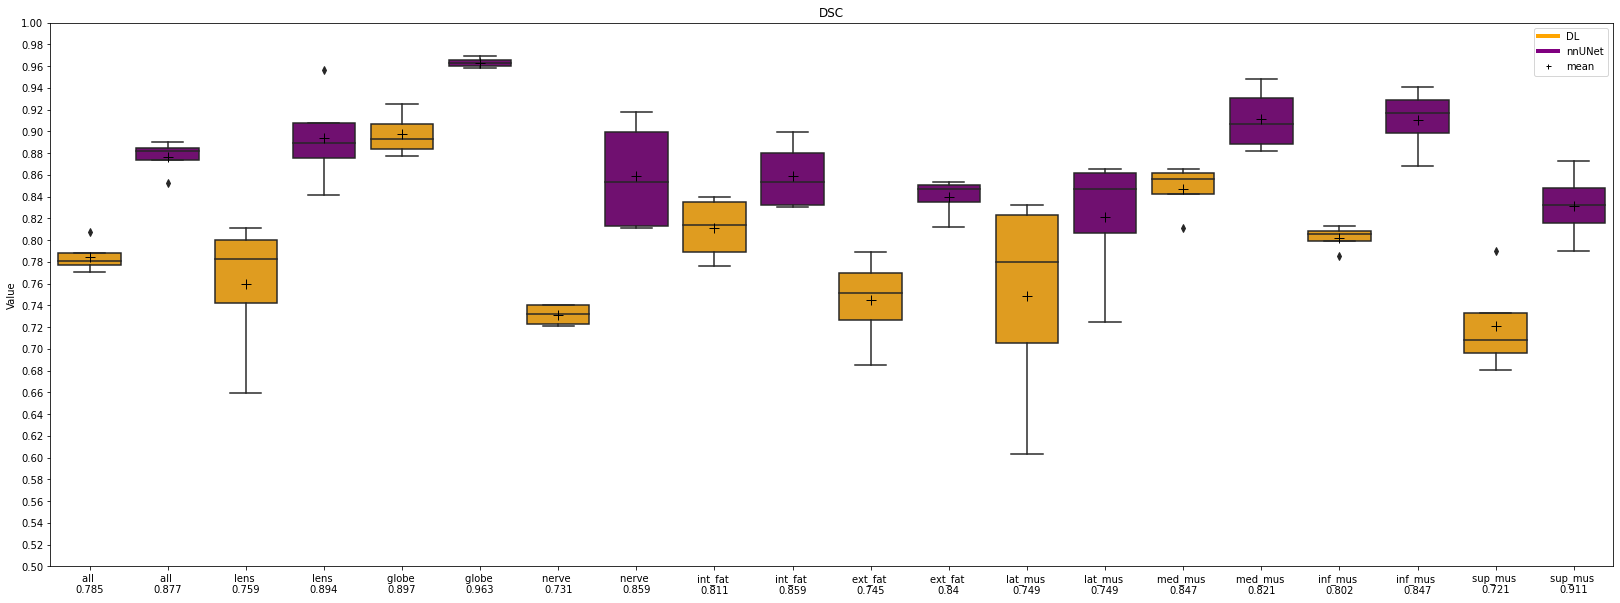

In [38]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import Line2D
import numpy as np

# Figure
fig, axs = plt.subplots(figsize=(28,10))
fig.canvas.manager.set_window_title('DSC per label')
fig.patch.set_facecolor('white')

# Legend
legend_elements = [Line2D([0], [0], color='orange', lw=4, label='DL'),
    Line2D([0], [0], color='purple', lw=4, label='nnUNet'),
    Line2D([], [], color='black', label='mean', marker='+', markersize=5, linestyle='None')]

# Axis
colours_palette = ['orange','purple','orange','purple','orange','purple','orange','purple','orange','purple','orange','purple','orange','purple','orange','purple','orange','purple','orange','purple']
meanpointprops = {"marker":"+", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"10"}
ax = sns.boxplot(data=df_dsc, palette=colours_palette, showmeans=True, meanprops=meanpointprops)
# ax = sns.swarmplot(data=df_dsc)
ax.set_title('DSC')
ax.legend(handles=legend_elements)
ax.set(ylabel="Value")
ax.set_xticklabels([
    f'all \n{np.around(np.mean(df_dsc[0]), 3)}', f'all \n{np.around(np.mean(df_dsc[1]), 3)}',
    f'lens \n{np.around(np.mean(df_dsc[2]), 3)}', f'lens \n{np.around(np.mean(df_dsc[3]), 3)}',
    f'globe \n{np.around(np.mean(df_dsc[4]), 3)}', f'globe \n{np.around(np.mean(df_dsc[5]), 3)}',
    f'nerve \n{np.around(np.mean(df_dsc[6]), 3)}', f'nerve \n{np.around(np.mean(df_dsc[7]), 3)}',
    f'int_fat \n{np.around(np.mean(df_dsc[8]), 3)}', f'int_fat \n{np.around(np.mean(df_dsc[9]), 3)}',
    f'ext_fat \n{np.around(np.mean(df_dsc[10]), 3)}', f'ext_fat \n{np.around(np.mean(df_dsc[11]), 3)}',
    f'lat_mus \n{np.around(np.mean(df_dsc[12]), 3)}', f'lat_mus \n{np.around(np.mean(df_dsc[12]), 3)}',
    f'med_mus \n{np.around(np.mean(df_dsc[14]), 3)}', f'med_mus \n{np.around(np.mean(df_dsc[13]), 3)}',
    f'inf_mus \n{np.around(np.mean(df_dsc[16]), 3)}', f'inf_mus \n{np.around(np.mean(df_dsc[14]), 3)}',
    f'sup_mus \n{np.around(np.mean(df_dsc[18]), 3)}', f'sup_mus \n{np.around(np.mean(df_dsc[15]), 3)}'])
ax.set_yticks(np.arange(0.5, 1.02, 0.02))

plt.show

plt.savefig(f'{nnunet_path}dl_vs_nn.png', bbox_inches='tight')

### ATLAS vs DL vs nnUNet

Read csv

In [39]:
from matplotlib.pyplot import Line2D
import pandas as pd

nnunet_path = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/nnUNet/nnUNet/nnUNet_inference/nnUNet_inference_labeled_dataset/' 

# CSVs
csv_dsc_reg = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/3D_multilabel/experiment_0/test_orig/data_dsc_reg.csv'
csv_dsc_dl = '/mnt/sda1/Repos/a-eye/a-eye_segmentation/deep_learning/3D_multilabel/experiment_0/test_orig/data_dsc.csv'
csv_dsc_nn = f'{nnunet_path}data_dsc_nn.csv'

# Pandas read CSV
df_reg = pd.read_csv(csv_dsc_reg)
df_dl = pd.read_csv(csv_dsc_dl)
df_nn = pd.read_csv(csv_dsc_nn)

# Gather data from generated dataframes
df_dsc = [
    df_reg['DSC_all'], df_dl['DSC_all'], df_nn['DSC_all'],
    df_reg['DSC_lens'], df_dl['DSC_lens'], df_nn['DSC_lens'],
    df_reg['DSC_globe'], df_dl['DSC_globe'], df_nn['DSC_globe'],
    df_reg['DSC_nerve'], df_dl['DSC_nerve'], df_nn['DSC_nerve'],
    df_reg['DSC_int_fat'], df_dl['DSC_int_fat'], df_nn['DSC_int_fat'],
    df_reg['DSC_ext_fat'], df_dl['DSC_ext_fat'], df_nn['DSC_ext_fat'],
    df_reg['DSC_lat_mus'], df_dl['DSC_lat_mus'], df_nn['DSC_lat_mus'],
    df_reg['DSC_med_mus'], df_dl['DSC_med_mus'], df_nn['DSC_med_mus'],
    df_reg['DSC_inf_mus'], df_dl['DSC_inf_mus'], df_nn['DSC_inf_mus'],
    df_reg['DSC_sup_mus'], df_dl['DSC_sup_mus'], df_nn['DSC_sup_mus']]


Plot

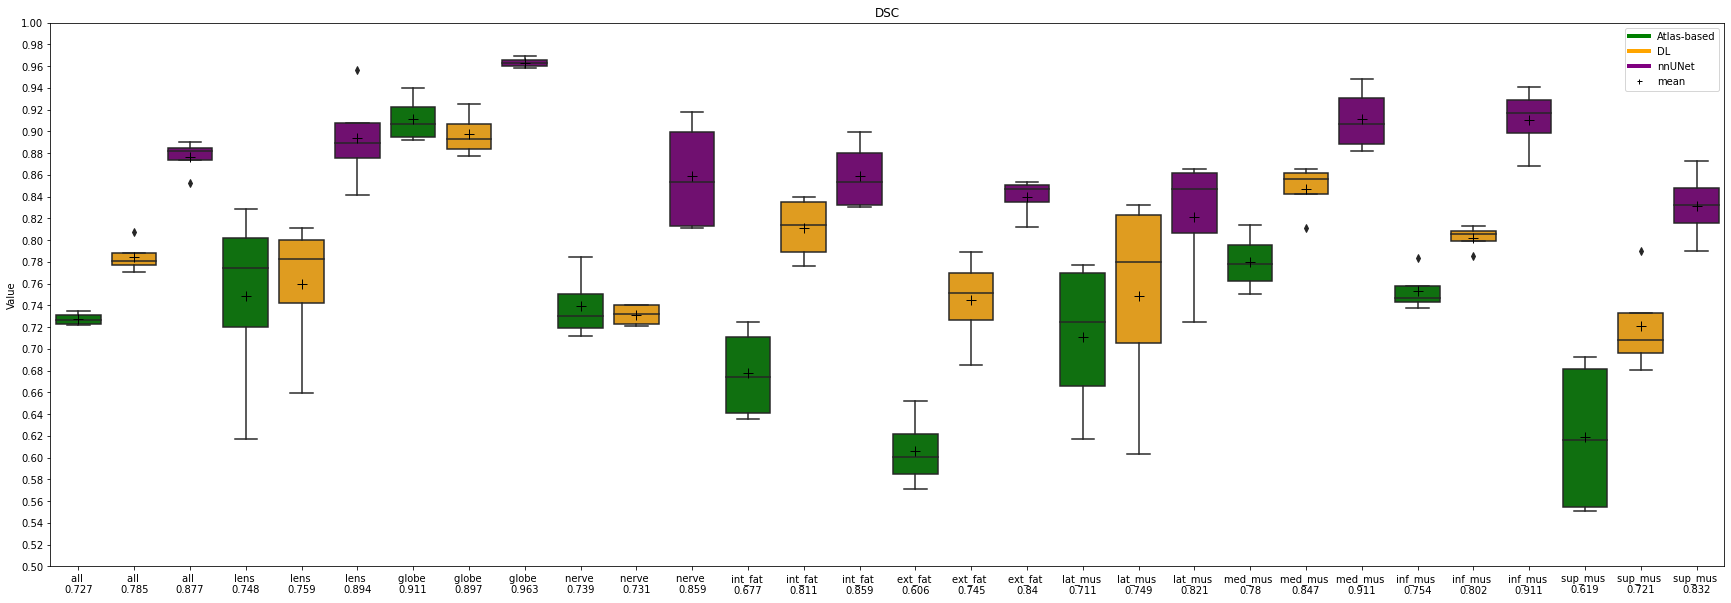

In [41]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import Line2D
import numpy as np

# Figure
fig, axs = plt.subplots(figsize=(30,10))
fig.canvas.manager.set_window_title('DSC per label')
fig.patch.set_facecolor('white')

# Legend
legend_elements = [
    Line2D([0], [0], color='green', lw=4, label='Atlas-based'),
    Line2D([0], [0], color='orange', lw=4, label='DL'),
    Line2D([0], [0], color='purple', lw=4, label='nnUNet'),
    Line2D([], [], color='black', label='mean', marker='+', markersize=5, linestyle='None')]

# Axis
colours_palette = ['green','orange','purple']*10
meanpointprops = {"marker":"+", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"10"}
ax = sns.boxplot(data=df_dsc, palette=colours_palette, showmeans=True, meanprops=meanpointprops)
# ax = sns.swarmplot(data=df_dsc)
ax.set_title('DSC')
ax.legend(handles=legend_elements)
ax.set(ylabel="Value")
ax.set_xticklabels([
    f'all \n{np.around(np.mean(df_dsc[0]), 3)}', f'all \n{np.around(np.mean(df_dsc[1]), 3)}', f'all \n{np.around(np.mean(df_dsc[2]), 3)}',
    f'lens \n{np.around(np.mean(df_dsc[3]), 3)}', f'lens \n{np.around(np.mean(df_dsc[4]), 3)}', f'lens \n{np.around(np.mean(df_dsc[5]), 3)}',
    f'globe \n{np.around(np.mean(df_dsc[6]), 3)}', f'globe \n{np.around(np.mean(df_dsc[7]), 3)}', f'globe \n{np.around(np.mean(df_dsc[8]), 3)}',
    f'nerve \n{np.around(np.mean(df_dsc[9]), 3)}', f'nerve \n{np.around(np.mean(df_dsc[10]), 3)}', f'nerve \n{np.around(np.mean(df_dsc[11]), 3)}',
    f'int_fat \n{np.around(np.mean(df_dsc[12]), 3)}', f'int_fat \n{np.around(np.mean(df_dsc[13]), 3)}', f'int_fat \n{np.around(np.mean(df_dsc[14]), 3)}',
    f'ext_fat \n{np.around(np.mean(df_dsc[15]), 3)}', f'ext_fat \n{np.around(np.mean(df_dsc[16]), 3)}', f'ext_fat \n{np.around(np.mean(df_dsc[17]), 3)}',
    f'lat_mus \n{np.around(np.mean(df_dsc[18]), 3)}', f'lat_mus \n{np.around(np.mean(df_dsc[19]), 3)}', f'lat_mus \n{np.around(np.mean(df_dsc[20]), 3)}',
    f'med_mus \n{np.around(np.mean(df_dsc[21]), 3)}', f'med_mus \n{np.around(np.mean(df_dsc[22]), 3)}', f'med_mus \n{np.around(np.mean(df_dsc[23]), 3)}',
    f'inf_mus \n{np.around(np.mean(df_dsc[24]), 3)}', f'inf_mus \n{np.around(np.mean(df_dsc[25]), 3)}', f'inf_mus \n{np.around(np.mean(df_dsc[26]), 3)}',
    f'sup_mus \n{np.around(np.mean(df_dsc[27]), 3)}', f'sup_mus \n{np.around(np.mean(df_dsc[28]), 3)}', f'sup_mus \n{np.around(np.mean(df_dsc[29]), 3)}'])
ax.set_yticks(np.arange(0.5, 1.02, 0.02))

plt.show

plt.savefig(f'{nnunet_path}reg_vs_dl_vs_nn.png', bbox_inches='tight')